In [2]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
df = pd.read_csv('covid-data.csv')

In [4]:
#look at the header row
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
#there are a lot of columns so first I will create a new simplified data base 
df1 = df[['continent','location', 'date', 'new_cases']]

In [6]:
#remove negative values
df1 = df1[(df1['new_cases'] >= 0)]

In [7]:
df1.dropna()

,continent,location,date,new_cases
0,Asia,Afghanistan,2020-02-24,5.0
1,Asia,Afghanistan,2020-02-25,0.0
2,Asia,Afghanistan,2020-02-26,0.0
3,Asia,Afghanistan,2020-02-27,0.0
4,Asia,Afghanistan,2020-02-28,0.0
...,...,...,...,...
121029,Africa,Zimbabwe,2021-09-29,213.0
121030,Africa,Zimbabwe,2021-09-30,335.0
121031,Africa,Zimbabwe,2021-10-01,208.0
121032,Africa,Zimbabwe,2021-10-02,66.0


In [8]:
#ensure the changes were applied 
df1.describe()

,new_cases
count,114831.000000
mean,6461.594665
std,39355.688661
min,0.000000
25%,3.000000
50%,92.000000
75%,924.000000
max,905948.000000


In [9]:
uniqueValues = df1['continent'].unique()
print(uniqueValues)

['Asia' nan 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


In [10]:
Asia = df1[df1.continent== 'Asia']
Asia.groupby('location').describe()

new_cases                                             \
                         count          mean           std  min       25%   
location                                                                    
Afghanistan              587.0    264.383305    425.553033  0.0     30.00   
Armenia                  582.0    454.793814    481.279203  0.0    132.50   
Azerbaijan               582.0    835.029210   1192.909799  0.0    113.00   
Bahrain                  588.0    468.090136    516.760378  0.0    124.75   
Bangladesh               575.0   2709.502609   2996.769346  0.0    990.50   
Bhutan                   577.0      4.519931      8.818386  0.0      0.00   
Brunei                   574.0     12.763066     51.024714  0.0      0.00   
Cambodia                 616.0    183.857143    297.778947  0.0      0.00   
China                    618.0    154.991909    812.565454  0.0     11.00   
Georgia                  586.0   1054.186007   1347.423751  0.0     11.25   
Hong Kong                619.0     19.752827     29.941291  0.0      2.00   
India                    612.0  55288.496732  79835.644914  0.0  11701.25   
Indonesia                581.0   7262.106713   9846.544131  0.0   1671.00   
Iran                     593.0   9484.195616   9431.784449  2.0   2445.00   
Iraq                     588.0   3417.819728   2777.128908  0.0   1112.75   
Israel                   589.0   2190.509338   2875.220879  0.0    164.00   
Japan                    620.0   2751.479032   4460.479525  0.0    308.25   
Jordan                   579.0   1427.274611   2014.868587  0.0     14.00   
Kazakhstan               569.0   1807.293497   3581.097259  0.0    322.00   
Kuwait                   588.0    700.345238    486.050391  0.0    299.50   
Kyrgyzstan               565.0    316.353982    588.887470  0.0     59.00   
Laos                     559.0     45.110912    112.272623  0.0      0.00   
Lebanon                  591.0   1059.177665   1185.743044  0.0     61.50   
Malaysia                 618.0   3685.380259   5870.666125  0.0     36.25   
Maldives                 575.0    147.775652    267.736642  0.0     30.00   
Mongolia                 573.0    545.158813   1151.802326  0.0      0.00   
Myanmar                  556.0    842.559353   1322.601227  0.0      5.00   
Nepal                    617.0   1292.047002   1860.098102  0.0    101.00   
Oman                     588.0    516.613946    758.994890  0.0      0.00   
Pakistan                 587.0   2131.768313   1657.388122  0.0    767.50   
Palestine                578.0    703.550173    747.406751  0.0     89.75   
Philippines              613.0   4230.667210   5032.239713  0.0    881.00   
Qatar                    583.0    406.368782    404.366336  0.0    170.50   
Saudi Arabia             581.0    941.710843   1014.351192  0.0    221.00   
Singapore                620.0    167.488710    346.583889  0.0     11.00   
South Korea              620.0    515.767742    594.310451  0.0     61.00   
Sri Lanka                616.0    844.857143   1342.507862  0.0      9.00   
Syria                    561.0     62.245989     60.062230  0.0     19.00   
Taiwan                   618.0     26.297735     91.242221  0.0      0.00   
Tajikistan               521.0     33.558541     39.633525  0.0      0.00   
Thailand                 616.0   2658.196429   5479.387952  0.0      4.00   
Timor                    561.0     34.905526     68.359789  0.0      0.00   
Turkey                   571.0  11183.232925  13352.439441  0.0   1567.00   
United Arab Emirates     614.0   1199.850163    938.941331  0.0    414.25   
Uzbekistan               568.0    308.568662    257.515964  0.0     75.75   
Vietnam                  620.0   1304.158065   3392.204165  0.0      1.00   
Yemen                    541.0     16.894640     24.726017  0.0      1.00   

                                                   
                          50%       75%       max  
location                                           
Afghanistan   

In [11]:
Asia = Asia.groupby('location').mean()
Asia.head()

,new_cases
location,
Afghanistan,264.383305
Armenia,454.793814
Azerbaijan,835.029210
Bahrain,468.090136
Bangladesh,2709.502609


In [12]:
labels = Asia.index

<function matplotlib.pyplot.show(close=None, block=None)>

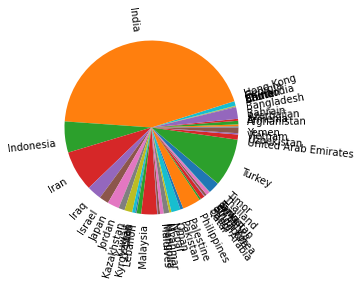

In [13]:
plt.pie(Asia.new_cases, labels = labels, rotatelabels= True)
plt.show

In [14]:
Europe = df1[df1.continent == 'Europe']
Europe.groupby('location').describe()

new_cases                                            \
                           count          mean           std  min      25%   
location                                                                     
Albania                    574.0    299.292683    331.652147  0.0    23.00   
Andorra                    581.0     26.199656     39.291063  0.0     0.00   
Austria                    587.0   1275.681431   1528.646958  0.0   130.50   
Belarus                    584.0    931.465753    603.027794  0.0   397.00   
Belgium                    608.0   2051.310855   2876.220193  0.0   297.00   
Bosnia and Herzegovina     578.0    407.501730    562.570207  0.0    16.00   
Bulgaria                   575.0    879.989565   1196.450029  0.0    83.00   
Croatia                    587.0    696.250426    976.044724  0.0    60.50   
Cyprus                     573.0    209.898778    257.767805  0.0     8.00   
Czechia                    581.0   2919.111876   4263.668825  0.0   138.00   
Denmark                    584.0    623.013699    667.655584  0.0   144.00   
Estonia                    585.0    270.695726    362.452765  0.0    16.00   
Finland                    612.0    232.225490    234.575638  0.0    29.75   
France                     609.0  12386.901478  15073.182184  0.0  1236.00   
Germany                    615.0   6929.339837   8512.362385  0.0   752.50   
Greece                     586.0   1128.511945   1155.965362  0.0    75.25   
Hungary                    579.0   1422.079447   2231.362151  0.0    28.00   
Iceland                    583.0     20.308748     31.167887  0.0     0.00   
Ireland                    580.0    683.675862    936.870771  0.0   194.00   
Italy                      611.0   7663.145663   8785.858760  0.0   907.00   
Kosovo                     569.0    281.534271    522.561610  0.0     5.00   
Latvia                     581.0    278.211704    337.639307  0.0     9.00   
Liechtenstein              579.0      5.958549     10.235717  0.0     0.00   
Lithuania                  583.0    578.758148    756.351669  0.0    23.50   
Luxembourg                 582.0    136.896907    237.597694  0.0     2.00   
Malta                      575.0     64.763478     73.915785  0.0     6.00   
Moldova                    575.0    516.925217    487.974473  0.0   132.00   
Monaco                     582.0      5.714777      7.609516  0.0     0.00   
Montenegro                 566.0    234.445230    224.527862  0.0    24.00   
Netherlands                585.0   3498.514530   3189.998073  0.0   613.00   
North Macedonia            586.0    328.460751    375.672247  0.0    37.00   
Norway                     586.0    325.141638    331.783946  0.0    65.25   
Poland                     579.0   5027.402418   7632.107464  0.0   297.00   
Portugal                   580.0   1847.025862   2617.738646  0.0   344.75   
Romania                    586.0   2160.114334   2521.993959  0.0   250.25   
Russia                     612.0  12213.807190   8149.232271  0.0  6175.75   
San Marino                 583.0      9.331046     14.441201  0.0     0.00   
Serbia                     577.0   1665.521664   2174.437690  0.0   110.00   
Slovakia                   577.0    720.958406   1024.573686  0.0    22.00   
Slovenia                   578.0    511.865052    636.332551  0.0    25.00   
Spain                      608.0   8299.146382  12309.488091  0.0     0.00   
Sweden                     611.0   1888.142390   3951.359231  0.0     0.00   
Switzerland                587.0   1433.684838   2481.214873  0.0    18.50   
Ukraine                    580.0   4425.646552   4602.728487  0.0   846.50   
United Kingdom             610.0  13024.522951  14659.092117  0.0  1674.00   
Vatican                    577.0      0.046794      0.452110  0.0     0.00   

                                                    
                           50%       75%       max  
location                                            
Albania                  139.0    538.75 

In [15]:
Europe = Europe.groupby('location').mean()
Europe.head()

,new_cases
location,
Albania,299.292683
Andorra,26.199656
Austria,1275.681431
Belarus,931.465753
Belgium,2051.310855


In [16]:
labels = Europe.index

<function matplotlib.pyplot.show(close=None, block=None)>

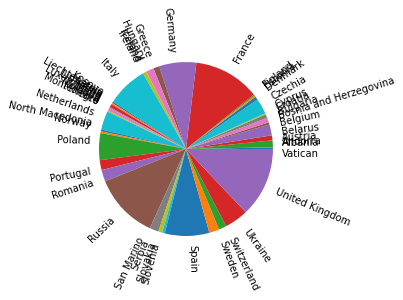

In [17]:
plt.pie(Europe.new_cases, labels = labels, rotatelabels= True)
plt.show

In [18]:
Africa = df1[df1.continent == 'Africa']
Africa.groupby('location').describe()

new_cases                                 \
                                 count         mean          std  min   
location                                                                
Algeria                          587.0   347.170358   305.929014  0.0   
Angola                           563.0   104.694494   117.426887  0.0   
Benin                            566.0    42.577739   210.447959  0.0   
Botswana                         553.0   324.086799  1035.986965  0.0   
Burkina Faso                     573.0    25.017452    45.602950  0.0   
Burundi                          552.0    33.099638   140.422060  0.0   
Cameroon                         577.0   159.970537   730.874448  0.0   
Cape Verde                       563.0    66.888099    70.359094  0.0   
Central African Republic         568.0    20.019366   172.688497  0.0   
Chad                             564.0     8.943262    13.320892  0.0   
Comoros                          522.0     7.959770    23.272571  0.0   
Congo                            568.0    25.279930    74.559689  0.0   
Cote d'Ivoire                    571.0   105.880911   117.223358  0.0   
Democratic Republic of Congo     572.0    99.645105   112.489945  0.0   
Djibouti                         565.0    22.870796    49.743911  0.0   
Egypt                            598.0   513.040134   423.232062  0.0   
Equatorial Guinea                568.0    21.764085   103.990608  0.0   
Eritrea                          562.0    11.962633    26.804176  0.0   
Eswatini                         569.0    80.926186   161.203216  0.0   
Ethiopia                         570.0   611.700000   553.530277  0.0   
Gabon                            569.0    53.862917   107.660716  0.0   
Gambia                           565.0    17.761062    48.858907  0.0   
Ghana                            569.0   224.045694   315.333176  0.0   
Guinea                           570.0    53.392982    57.378403  0.0   
Guinea-Bissau                    558.0    10.953405    21.631266  0.0   
Kenya                            570.0   438.796491   398.681223  0.0   
Lesotho                          509.0    41.964637   319.755669  0.0   
Liberia                          564.0    10.505319    33.991666  0.0   
Libya                            559.0   611.518784   698.631678  0.0   
Madagascar                       562.0    76.343416   138.928281  0.0   
Malawi                           550.0   112.021818   209.271439  0.0   
Mali                             558.0    27.396057    39.857274  0.0   
Mauritania                       569.0    63.555360    77.791846  0.0   
Mauritius                        564.0    27.831560   117.025881  0.0   
Morocco                          581.0  1609.865749  2168.598807  0.0   
Mozambique                       560.0   269.321429   420.797221  0.0   
Namibia                          569.0   224.611599   376.977073  0.0   
Niger                            562.0    10.758007    18.790955  0.0   
Nigeria                          584.0   352.976027   390.714057  0.0   
Rwanda                           569.0   172.003515   300.415768  0.0   
Sao Tome and Principe            546.0     6.474359    15.299706  0.0   
Senegal                          581.0   127.022375   183.391125  0.0   
Seychelles                       565.0    38.074336    67.740259  0.0   
Sierra Leone                     552.0    11.586957    18.787851  0.0   
Somalia                          567.0    36.291005    68.888974  0.0   
South Africa                     578.0  5028.411765  5356.224557  0.0   
South Sudan                      547.0    22.012797    49.935103  0.0   
Sudan                            568.0    67.422535   115.372723  0.0   
Tanzania                         567.0    45.583774  1028.284335  0.0   
Togo                             577.0    44.254766    70.956481  0.0   
Tunisia                          579.0  1222.768566  1616.044294  0.0   
Uganda                           560.0   221.573214   940.107872  0.0   
Zambia        

In [19]:
Africa = Africa.groupby('location').mean()
Africa.head()

,new_cases
location,
Algeria,347.170358
Angola,104.694494
Benin,42.577739
Botswana,324.086799
Burkina Faso,25.017452


In [20]:
labels = Africa.index

<function matplotlib.pyplot.show(close=None, block=None)>

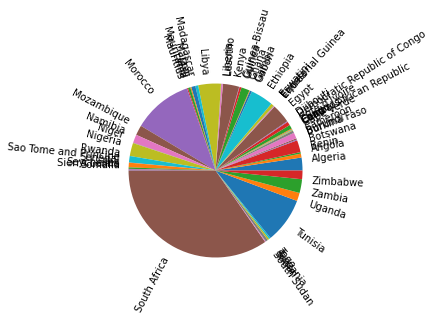

In [21]:
plt.pie(Africa.new_cases, labels = labels, rotatelabels= True)
plt.show

In [22]:
NorthAmerica = df1[df1.continent == 'North America']
NorthAmerica.groupby('location').describe()

new_cases                                   \
                                     count          mean           std  min   
location                                                                      
Antigua and Barbuda                  568.0      6.170775     23.209742  0.0   
Bahamas                              567.0     37.238095     64.971846  0.0   
Barbados                             566.0     15.533569     35.803566  0.0   
Belize                               560.0     37.505357     83.901211  0.0   
Canada                               617.0   2658.938412   2636.468136  0.0   
Costa Rica                           577.0    925.256499   1151.085682  0.0   
Cuba                                 571.0   1561.203152   2738.450521  0.0   
Dominica                             561.0      6.547237     37.224056  0.0   
Dominican Republic                   582.0    619.982818    438.534871  0.0   
El Salvador                          563.0    185.506217    273.802689  0.0   
Grenada                              561.0      9.538324     48.649318  0.0   
Guatemala                            569.0    995.166960   1135.860404  0.0   
Haiti                                563.0     38.927176     64.773188  0.0   
Honduras                             571.0    643.248687    620.707899  0.0   
Jamaica                              572.0    148.078671    199.114887  0.0   
Mexico                               584.0   6299.623288   5512.273898  0.0   
Nicaragua                            564.0     25.617021     92.138066  0.0   
Panama                               573.0    816.300175    740.656940  0.0   
Saint Kitts and Nevis                558.0      3.573477     10.986076  0.0   
Saint Lucia                          569.0     20.550088     51.111016  0.0   
Saint Vincent and the Grenadines     569.0      6.460457     18.820284  0.0   
Trinidad and Tobago                  569.0     90.057996    132.786927  0.0   
United States                        620.0  70456.527419  67748.906550  0.0   

                                                                        
                                       25%      50%      75%       max  
location                                                                
Antigua and Barbuda                   0.00      0.0      2.0     299.0  
Bahamas                               0.00      5.0     53.0     527.0  
Barbados                              0.00      2.0     11.0     228.0  
Belize                                0.00      7.5     47.0    1382.0  
Canada                              517.00   1626.0   4237.0   11381.0  
Costa Rica                            5.00    530.0   1420.0    6952.0  
Cuba                                 32.50    124.0   1132.0    9907.0  
Dominica                              0.00      0.0      0.0     386.0  
Dominican Republic                  309.00    511.0    860.0    2370.0  
El Salvador                           6.00    148.0    247.0    2324.0  
Grenada                               0.00      0.0      0.0     522.0  
Guatemala                           239.00    685.0   1123.0    5826.0  
Haiti                                 0.00     15.0     48.0     542.0  
Honduras                            166.50    576.0    871.0    4043.0  
Jamaica                              11.75     73.5    188.5    1430.0  
Mexico                             2809.75   5139.5   7506.0   32244.0  
Nicaragua                             0.00      0.0      0.0     718.0  
Panama                              357.00    664.0    998.0    5186.0  
Saint Kitts and Nevis                 0.00      0.0      0.0      87.0  
Saint Lucia                           0.00      1.0     16.0     389.0  
Saint Vincent and the Grenadines      0.00      0.0      4.0     158.0  
Trinidad and Tobago                   3.00     21.0    129.0     708.0  
United States                     24431.00  47621.5  84621.5  303008.0

In [23]:
NorthAmerica = NorthAmerica.groupby('location').mean()
NorthAmerica.head()

,new_cases
location,
Antigua and Barbuda,6.170775
Bahamas,37.238095
Barbados,15.533569
Belize,37.505357
Canada,2658.938412


In [24]:
labels = NorthAmerica.index

<function matplotlib.pyplot.show(close=None, block=None)>

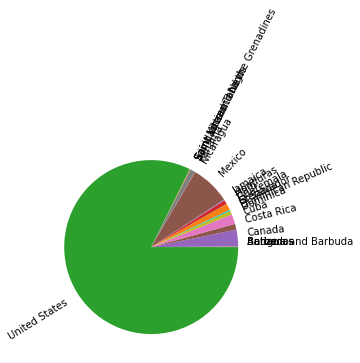

In [25]:
plt.pie(NorthAmerica.new_cases, labels = labels, rotatelabels= True)
plt.show

In [26]:
SouthAmerica = df1[df1.continent == 'South America']
SouthAmerica.groupby('location').describe()

new_cases                                                      \
              count          mean           std  min       25%      50%   
location                                                                  
Argentina     580.0   9068.513793   8198.075048  0.0   2602.00   7490.0   
Bolivia       572.0    876.187063    895.737412  0.0    183.00    658.5   
Brazil        585.0  36698.622222  25625.731363  0.0  16207.00  33057.0   
Chile         589.0   2812.567063   2313.147830  0.0   1121.00   1961.0   
Colombia      577.0   8599.746967   7509.269080  0.0   2357.00   7355.0   
Ecuador       578.0    902.569204    893.963061  0.0    292.25    791.0   
Guyana        570.0     57.014035     69.447732  0.0      5.00     35.0   
Paraguay      575.0    800.038261    835.221224  0.0     63.00    632.0   
Peru          577.0   3773.454073   4003.984634  0.0    671.00   2798.0   
Suriname      569.0     74.314587    114.449653  0.0      5.00     27.0   
Uruguay       569.0    684.017575   1128.383458  0.0     13.00    118.0   
Venezuela     569.0    656.119508    540.006797  0.0    236.00    505.0   

                               
                75%       max  
location                       
Argentina  12644.00   41080.0  
Bolivia     1290.75    7072.0  
Brazil     53582.00  150106.0  
Chile       4209.00   13990.0  
Colombia   11827.00   33594.0  
Ecuador     1231.00   11536.0  
Guyana        85.50     529.0  
Paraguay    1117.50    3481.0  
Peru        5698.00   21358.0  
Suriname      94.00     844.0  
Uruguay      709.00    7289.0  
Venezuela   1047.00    2964.0

In [27]:
SouthAmerica = SouthAmerica.groupby('location').mean()
SouthAmerica.head()

,new_cases
location,
Argentina,9068.513793
Bolivia,876.187063
Brazil,36698.622222
Chile,2812.567063
Colombia,8599.746967


In [28]:
labels = SouthAmerica.index

<function matplotlib.pyplot.show(close=None, block=None)>

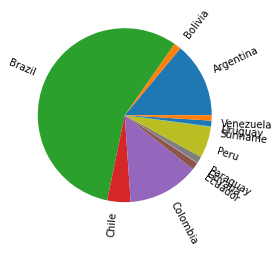

In [29]:
plt.pie(SouthAmerica.new_cases, labels = labels, rotatelabels= True)
plt.show

In [30]:
Oceania = df1[df1.continent == 'Oceania']
Oceania.groupby('location').describe()

new_cases                                          \
                         count        mean         std  min  25%   50%   
location                                                                 
Australia                617.0  183.810373  424.256969  0.0  9.0  17.0   
Fiji                     564.0   90.783688  246.125384  0.0  0.0   0.0   
Kiribati                 139.0    0.014388    0.119517  0.0  0.0   0.0   
Marshall Islands         340.0    0.014706    0.195272  0.0  0.0   0.0   
Micronesia (country)     256.0    0.003906    0.062500  0.0  0.0   0.0   
New Zealand              580.0    7.565517   15.217508  0.0  0.0   2.0   
Palau                     43.0    0.116279    0.498058  0.0  0.0   0.0   
Papua New Guinea         562.0   36.811388   95.854316  0.0  0.0   0.0   
Samoa                    320.0    0.009375    0.096521  0.0  0.0   0.0   
Solomon Islands          357.0    0.056022    0.406684  0.0  0.0   0.0   
Vanuatu                  328.0    0.012195    0.134905  0.0  0.0   0.0   

                                      
                         75%     max  
location                              
Australia             115.00  2400.0  
Fiji                    5.00  1854.0  
Kiribati                0.00     1.0  
Marshall Islands        0.00     3.0  
Micronesia (country)    0.00     1.0  
New Zealand             6.25    89.0  
Palau                   0.00     3.0  
Papua New Guinea       10.00   551.0  
Samoa                   0.00     1.0  
Solomon Islands         0.00     5.0  
Vanuatu                 0.00     2.0

In [31]:
Oceania = Oceania.groupby('location').mean()
Oceania.head()

,new_cases
location,
Australia,183.810373
Fiji,90.783688
Kiribati,0.014388
Marshall Islands,0.014706
Micronesia (country),0.003906


In [32]:
labels = Oceania.index

<function matplotlib.pyplot.show(close=None, block=None)>

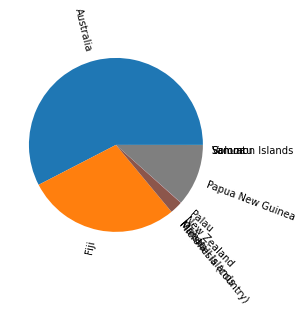

In [33]:
plt.pie(Oceania.new_cases, labels = labels, rotatelabels= True)
plt.show